In [87]:
# Importing Libraries
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve

In [88]:
train = pd.read_csv('./data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [89]:
features = ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']
train_features = train[features]
train_labels = train[['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]

train_features.shape, train_labels.shape

((7111, 8), (7111, 3))

<AxesSubplot:>

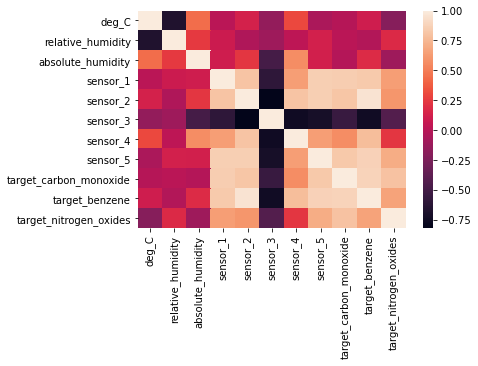

In [90]:
sns.heatmap(train.corr())

<AxesSubplot:>

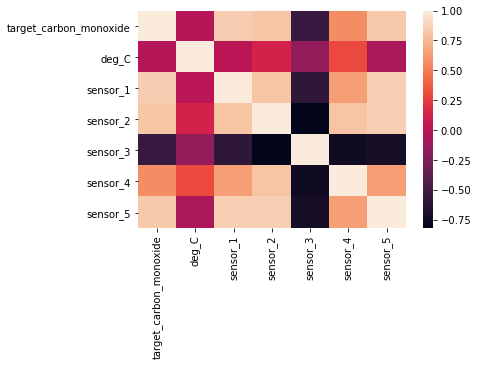

In [162]:
sns.heatmap(train[['target_carbon_monoxide','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']].corr())

<AxesSubplot:>

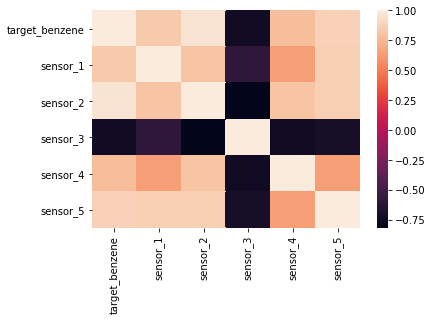

In [160]:
sns.heatmap(train[['target_benzene','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']].corr())

<AxesSubplot:>

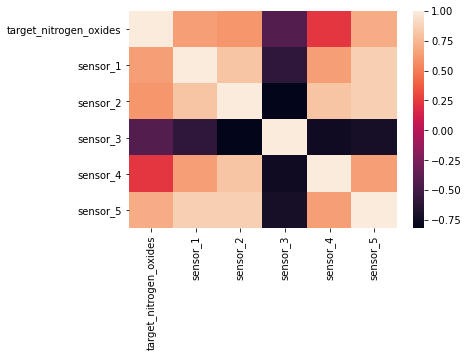

In [158]:
sns.heatmap(train[['target_nitrogen_oxides','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']].corr())

In [167]:
# Model Development

def initialize_weights(shape, dtype=None):
    
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

def initialize_bias(shape, dtype=None):
    
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

def DeepLearningModel(input_shape):
    model = Sequential()
    
    model.add(Input(input_shape))

#     model.add(Dense(128, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    
    model.add(Dense(3, activation='linear', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))    
    
    return model

In [169]:
# Hyperparameters
# These hyperparameters can be modified to get different output.
# I found these to work well for the data. Play around and let me know in comments
model = DeepLearningModel((8))
print(model.summary())
lr = 0.005
epochs = 60
batch_size = 200
optimizer = Adam(lr)

# You can try different Keras Error for Different Prediction Values.
model.compile(optimizer=optimizer, loss='mean_squared_logarithmic_error', metrics=['accuracy'])
history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 3)                 27        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
36/36 [==============================] - 0s 1ms/step - loss: 4.2396 - accuracy: 0.5735 
Epoch 2/60
36/36 [==============================] - 0s 1ms/step - loss: 0.7878 - accuracy: 1.0000
Epoch 3/60
36/36 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 1.0000
Epoch 4/60
36/36 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 1.0000
Epoch 5/60
36/36 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 1.0000
Epoch 6/60
36/36 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 1.0000
Epoch 7/60
36/36 [==============================] - 0s 1m

<AxesSubplot:>

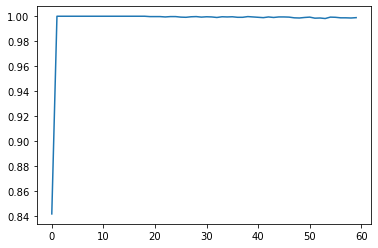

In [171]:
sns.lineplot(x=history.epoch, y=history.history['accuracy'])

<AxesSubplot:>

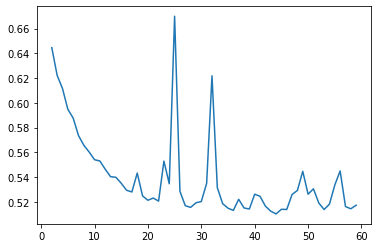

In [172]:
sns.lineplot(x=history.epoch[2:], y=history.history['loss'][2:])

In [100]:
test = pd.read_csv('./data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          2247 non-null   object 
 1   deg_C              2247 non-null   float64
 2   relative_humidity  2247 non-null   float64
 3   absolute_humidity  2247 non-null   float64
 4   sensor_1           2247 non-null   float64
 5   sensor_2           2247 non-null   float64
 6   sensor_3           2247 non-null   float64
 7   sensor_4           2247 non-null   float64
 8   sensor_5           2247 non-null   float64
dtypes: float64(8), object(1)
memory usage: 158.1+ KB


In [101]:
test_features = test[features]

In [102]:
predictions = pd.DataFrame(np.round(model.predict(test_features)))

In [118]:
predictions

,0,1,2
0,2.0,6.0,302.0
1,3.0,10.0,451.0
2,2.0,9.0,406.0
3,2.0,10.0,405.0
4,2.0,7.0,314.0
...,...,...,...
2242,3.0,15.0,428.0
2243,2.0,12.0,322.0
2244,3.0,14.0,333.0
2245,2.0,11.0,330.0


In [103]:
dates = test['date_time']

In [104]:
submission = {
    'date_time' : dates,
    'target_carbon_monoxide' : predictions[0],
    'target_benzene' : predictions[1],
    'target_nitrogen_oxides' : predictions[2]
}

In [105]:
pd.DataFrame(submission).to_csv('sub_v5.csv', index=False)